## **I. KKBOX Background**

<div style="text-align:justify">
KKBOX, a Taiwan-based content streaming and analysis service with over 400 employees, initially launched in 1999, primarily offering mobile value-add services and personal computer tools. However, recognizing the emerging digital music market and the absence of video streaming options in Taiwan, <b>KKBOX transitioned into a streaming music business by 2004</b>. By 2023, KKBOX had captured <b>60% market share in Taiwan</b> (iKala Cloud - 亞洲最創新的雲端 AI 科技夥伴, 2023). It generated $26.4 million in revenue and served 10 million customers (LATKA, 2023), with 59.83% male and 40.17% female users, and <b>the largest age group being 25 - 34 year olds (KKBOX, 2017)</b>.
<br>
<br>
Today, KKBOX stands as one of the largest music streaming services in the Asia-Pacific region, serving customers across <b>Hong Kong, Japan, Malaysia, Taiwan, Thailand, and Singapore</b>, offering access to an extensive library of 100+ million songs (KKBOX - LISTEN, AND BE HEARD, 2024) on various devices.
<br>
<br>
Operating on <b>a freemium model</b>, KKBOX caters to both paid subscribers and free users, allowing them to enjoy seamless music streaming experiences across smartphones, TVs, media centers, and computers. With compatibility across multiple platforms including Windows, Mac OS X, iOS, Android, Symbian, Bada, and Apple Watch since 2015, KKBOX ensures accessibility and convenience for its diverse user base.
<br>
<br>
While KKBOX is currently employing a collaborative filtering-based algorithm with matrix factorization and word embedding techniques in their recommendation system, yet there is a belief that integrating new methodologies could yield superior results. With this in mind, the objective of this report is to devise an improved recommendation system for the KKBox music streaming service.
</div>

## **II. Data preparation**

### **2.1. Packages loading**

In [ ]:
# Install requirements
!pip install numpy datetime matplotlib wordcloud seaborn pandas plotly scikit-learn

In [ ]:
import pandas as pd
# Format data display
pd.options.display.float_format = "{:.2f}".format
pd.set_option('display.max_columns', 10)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("ggplot")
from wordcloud import WordCloud
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # Random Forest
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB # Naives Bayes
from sklearn.metrics import classification_report, accuracy_score

### **2.2. Data Preparation**

#### Loading

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
songs_df = pd.read_csv("songs.csv")
song_extra_df = pd.read_csv("song_extra_info.csv")
members_df = pd.read_csv("members.csv")

#### Merging dataframes

##### A quick view

In [ ]:
# Display dataframe
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.00
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.00
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.00
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.00
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.00


In [ ]:
test_df.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [ ]:
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.00
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.00
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.00
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.00
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.00


In [ ]:
song_extra_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


##### Merging

In [ ]:
# Merge dataframe
train_cleaned = pd.merge(train_df, songs_df, on="song_id", how="left")
train_cleaned = pd.merge(train_cleaned, members_df, on="msno", how="left")
train_cleaned = pd.merge(train_cleaned, song_extra_df, on="song_id", how="left")

test_cleaned = pd.merge(test_df, songs_df, on="song_id", how="left")
test_cleaned = pd.merge(test_cleaned, members_df, on="msno", how="left")
test_cleaned = pd.merge(test_cleaned, song_extra_df, on="song_id", how="left")

#### Data Cleaning

<div style="text-align:justify">
The below table summarize the cleaning steps:
</div>

Attributes | Data Types<br>(original) | % Missing Values<br>(training set) |  % Missing Values<br>(testing set) | Cleaning steps
-----------|-----------|------------------|-----------------|----------------
source_system_tab | object | 0.36% | 0.33% | Replace null value by "Unknown"
source_screen_name | object | 5.05% | 6.37% | Replace null value by "Unknown"<br>Replace value that appear in testing set but do not appear in training set by "Others"
source_type | object | 0.31% | 0.29% | Replace null value by "Unknown"<br>Replace value that appear in testing set but do not appear in training set by "Others"
lyricist | object | 42.12% | 47.90% | Replace null value by "Unknown"
composer | object | 22.12% | 24.22% | Replace null value by "Unknown"
genre_ids | object | 1.45% | 1.65% | Replace null value by "Unknown"
artist_name | object | 0.00% | 0.00% | Replace null value by "Unknown"
gender | object | 39.33% | 41.15% | Replace null value by "Unknown"
isrc | object | 7.77% | 7.69% | Replace null value by "Unknown"
name | object | 0.01% | 0.03% | Replace null value by "Unknown"
language | float64 | 0.00% | 0.00% | Replace missing value by -1
song_length | float64 | 0.00% | 0.00% | Delete observation with missing value in training set<br>Replace null value in testing set by the median
registration_init_time | int64 | 0.00% | 0.00% | Convert to datetime object
expiration_date	 | int64 | 0.00% | 0.00% | Convert to datetime object
target | float64 | 0.00% | | Delete observation with missing value in training set

<div style="text-align:justify"> <i>Note: The percents are displayed only up to 2 decimals.</i></div>

##### % Missing value of training and testing set

In [ ]:
def display_missing_value(data):
    datatype = pd.DataFrame(data.dtypes,columns=["Data Type"])
    datatype["Missing Values"]=data.isnull().sum()
    datatype["% Missing Values"]=data.isnull().sum()/len(data)*100
    print(datatype.sort_values(by="% Missing Values", ascending=False).style.background_gradient(cmap='Set3',axis=0).format({'% Missing Values': '{:.2f}%'}))
    return datatype.sort_values(by="% Missing Values", ascending=False).style.background_gradient(cmap='Set3',axis=0).format({'% Missing Values': '{:.2f}%'})

In [ ]:
# Check for missing values in training set
display_missing_value(train_cleaned)

,Data Type,Missing Values,% Missing Values
lyricist,object,1356807,42.12%
gender,object,1267092,39.33%
composer,object,712607,22.12%
isrc,object,250254,7.77%
source_screen_name,object,162575,5.05%
genre_ids,object,46552,1.45%
source_system_tab,object,11742,0.36%
source_type,object,9968,0.31%
name,object,349,0.01%
language,float64,63,0.00%


In [ ]:
# Check for missing values in testing set
display_missing_value(test_cleaned)

,Data Type,Missing Values,% Missing Values
lyricist,object,1224747,47.90%
gender,object,1052224,41.15%
composer,object,619304,24.22%
isrc,object,196643,7.69%
source_screen_name,object,162883,6.37%
genre_ids,object,42110,1.65%
source_system_tab,object,8442,0.33%
source_type,object,7297,0.29%
name,object,778,0.03%
language,float64,42,0.00%


##### Categorical columns

###### source_system_tab

In [ ]:
# Check for unique values of source_system_tab
print("Unique values of training data set:", set(train_cleaned["source_system_tab"].unique()))
print("Unique values of testing data set:", set(test_cleaned["source_system_tab"].unique()))

Unique values of training data set: {'listen with', nan, 'discover', 'radio', 'search', 'my library', 'notification', 'explore', 'settings'}
Unique values of testing data set: {'listen with', nan, 'discover', 'radio', 'search', 'my library', 'notification', 'explore', 'settings'}


In [ ]:
# fill missing values in source_system_tab by "Unknown"
train_cleaned["source_system_tab"] = train_cleaned["source_system_tab"].fillna("Unknown")
test_cleaned["source_system_tab"] = test_cleaned["source_system_tab"].fillna("Unknown")

###### source_screen_name

In [ ]:
# Check for unique values of source_screen_name
print("Unique values of training data set:", set(train_cleaned["source_screen_name"].unique()))
print("Unique values of testing data set:", set(test_cleaned["source_screen_name"].unique()))

Unique values of training data set: {'Discover Genre', 'Online playlist more', 'Discover Feature', 'Local playlist more', 'Album more', 'My library', nan, 'Radio', 'Discover Chart', 'Explore', 'Search Trends', 'Artist more', 'Payment', 'Self profile more', 'Unknown', 'Discover New', 'Others profile more', 'My library_Search', 'Search', 'Concert', 'Search Home'}
Unique values of testing data set: {'Discover Genre', 'Online playlist more', 'People global', 'Discover Feature', 'People local', 'Local playlist more', 'Album more', 'My library', nan, 'Radio', 'Discover Chart', 'Explore', 'Search Trends', 'Artist more', 'Payment', 'Self profile more', 'Unknown', 'Discover New', 'Others profile more', 'My library_Search', 'Search', 'Concert', 'Search Home'}


<div style="text-align:justify">
The null values for both set will be replaced with "Unknown".
The testing set has values 'People global' and 'People local' while training set does not. This is not helping the model to predict, so it will be replaced with "others".
</div>

In [ ]:
train_cleaned["source_screen_name"] = train_cleaned["source_screen_name"].fillna("Unknown")
test_cleaned["source_screen_name"] = test_cleaned["source_screen_name"].fillna("Unknown")
test_cleaned['source_screen_name'] = test_cleaned['source_screen_name'].replace(['People local', 'People global'], 'Others')

###### source_type

In [ ]:
# Check for unique values of source_type
print("Unique values of training data set:", set(train_cleaned["source_type"].unique()))
print("Unique values of testing data set:", set(test_cleaned["source_type"].unique()))

Unique values of training data set: {'local-playlist', nan, 'radio', 'artist', 'online-playlist', 'local-library', 'listen-with', 'song', 'topic-article-playlist', 'top-hits-for-artist', 'album', 'song-based-playlist'}
Unique values of testing data set: {'local-playlist', 'top-hits-for-artist', 'radio', nan, 'artist', 'local-library', 'listen-with', 'song', 'topic-article-playlist', 'my-daily-playlist', 'online-playlist', 'album', 'song-based-playlist'}


<div style="text-align:justify">
There is no value 'my-daily-playlist' in training set. So it will be replaced with "others" in the tetsing set.
</div>

In [ ]:
train_cleaned["source_type"] = train_cleaned["source_type"].fillna("Unknown")
test_cleaned["source_type"] = test_cleaned["source_type"].fillna("Unknown")
test_cleaned['source_type'] = test_cleaned['source_type'].replace('my-daily-playlist', 'Others')

###### language

In [ ]:
# Check for unique values of language
print("Unique values of training data set:", set(train_cleaned["language"].unique()))
print("Unique values of testing data set:", set(test_cleaned["language"].unique()))

Unique values of training data set: {3.0, 38.0, 10.0, 45.0, 17.0, nan, 52.0, 24.0, 59.0, -1.0, 31.0}
Unique values of testing data set: {3.0, 38.0, 10.0, 45.0, nan, 17.0, 52.0, 24.0, 59.0, -1.0, 31.0}


In [ ]:
train_cleaned["language"] = train_cleaned["language"].fillna(-1.0)
test_cleaned["language"] = test_cleaned["language"].fillna(-1.0)

###### gender

In [ ]:
# Check for unique values of gender
print("Unique values of training data set:", set(train_cleaned["gender"].unique()))
print("Unique values of testing data set:", set(test_cleaned["gender"].unique()))

Unique values of training data set: {'female', nan, 'male'}
Unique values of testing data set: {'female', nan, 'male'}


In [ ]:
train_cleaned["gender"] = train_cleaned["gender"].fillna("Unknown")
test_cleaned["gender"] = test_cleaned["gender"].fillna("Unknown")

##### Other string columns

###### Genres

In [ ]:
train_cleaned["genre_ids"] = train_cleaned["genre_ids"].fillna("Unknown")
test_cleaned["genre_ids"] = test_cleaned["genre_ids"].fillna("Unknown")

###### Composer

In [ ]:
train_cleaned["composer"] = train_cleaned["composer"].fillna("Unknown")
test_cleaned["composer"] = test_cleaned["composer"].fillna("Unknown")

###### Lyricist

In [ ]:
train_cleaned["lyricist"] = train_cleaned["lyricist"].fillna("Unknown")
test_cleaned["lyricist"] = test_cleaned["lyricist"].fillna("Unknown")

###### Artists' name

In [ ]:
train_cleaned["artist_name"] = train_cleaned["artist_name"].fillna("Unknown")
test_cleaned["artist_name"] = train_cleaned["artist_name"].fillna("Unknown")

###### Name

In [ ]:
train_cleaned["name"] = train_cleaned["name"].fillna("Unknown")
test_cleaned["name"] = test_cleaned["name"].fillna("Unknown")

###### ISRC

In [ ]:
train_cleaned["isrc"] = train_cleaned["isrc"].fillna("Unknown")
test_cleaned["isrc"] = test_cleaned["isrc"].fillna("Unknown")

##### Handling datetime columns

In [ ]:
train_cleaned['registration_init_time'] = pd.to_datetime(train_cleaned['registration_init_time'], format='%Y%m%d')
train_cleaned['expiration_date'] = pd.to_datetime(train_cleaned['expiration_date'], format='%Y%m%d')

test_cleaned['registration_init_time'] = pd.to_datetime(test_cleaned['registration_init_time'], format='%Y%m%d')
test_cleaned['expiration_date'] = pd.to_datetime(test_cleaned['expiration_date'], format='%Y%m%d')

##### Continuous number value (song length)

<div style="text-align:justify">
Let's first check the distribution of this variable throughout both training and testing set.
</div>

In [ ]:
combined = pd.concat([train_cleaned.drop(columns=["target"]), test_cleaned], axis=0)

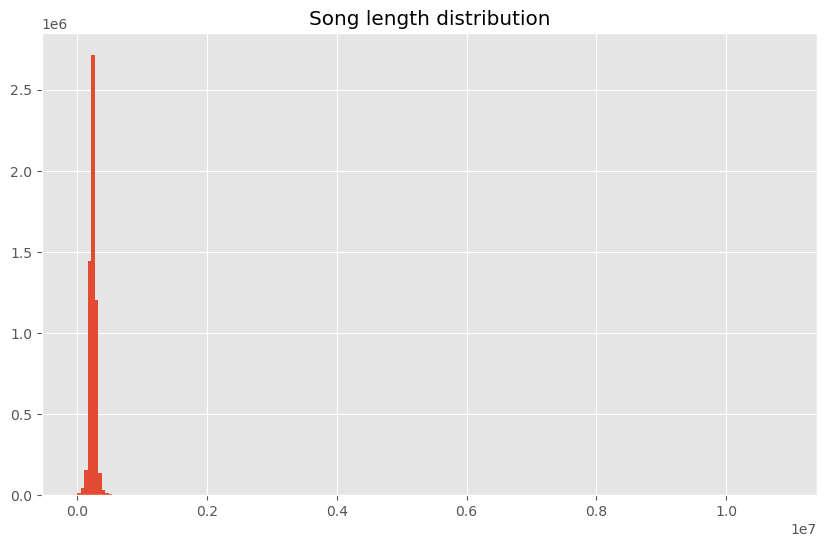

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(combined['song_length'].dropna(), bins = 200)
plt.title("Song length distribution")
plt.show()

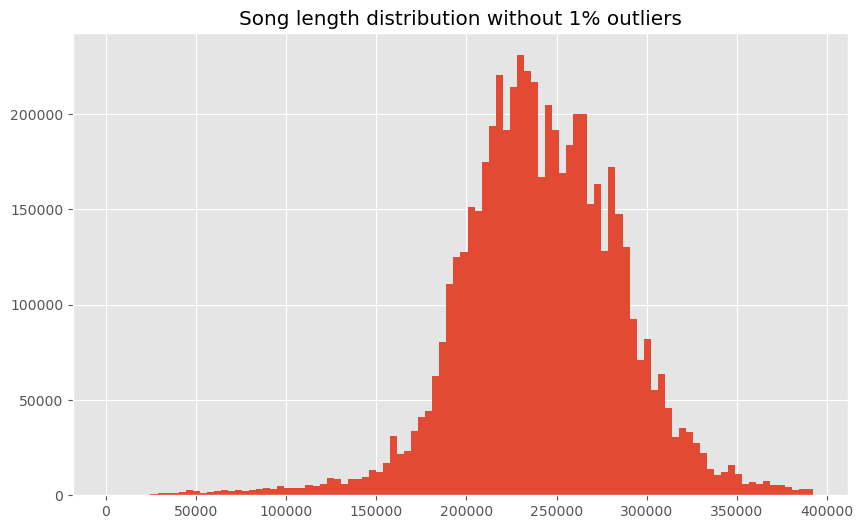

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(combined['song_length'].dropna()[combined['song_length'].dropna()<np.quantile(combined['song_length'].dropna(), .99)], bins = 100)
plt.title("Song length distribution without 1% outliers")
plt.show()

<div style="text-align:justify">
It seem like there some subtantial outliers in this variable. Thus, the null values will be replaced with the median in stead of the mean.
</div>

In [ ]:
train_cleaned.dropna(subset=['song_length'], inplace = True)
test_cleaned['song_length'].fillna((combined['song_length'].median()), inplace=True)

In [ ]:
# Delete unecessary dataframe to free the the memory storage
del combined

##### Missing target in training set

In [ ]:
train_cleaned = train_cleaned.dropna(subset=['target'])

## **III. Explanatory Data Analysis**

### Explore the users

#### Age group & gender distribution

In [ ]:
# Define a function to categorize age
def categorize_age(x):
  if type(x) == int:
      if x >= 100:
          return 'The greatest generation'
      elif 100 > x >= 60:
          return 'Baby boomer'
      elif 60 > x >= 45:
          return 'Gen X'
      elif 45 > x >= 30:
          return 'Millennials'
      elif 30 > x >= 12:
          return 'Gen Z'
      elif 12 > x > 0:
          return 'Gen Z'
      else:
          return np.nan
  else:
    return np.nan

# Apply the categorize_age function to the 'bd' column
members_df['age_category'] = members_df['bd'].apply(categorize_age)

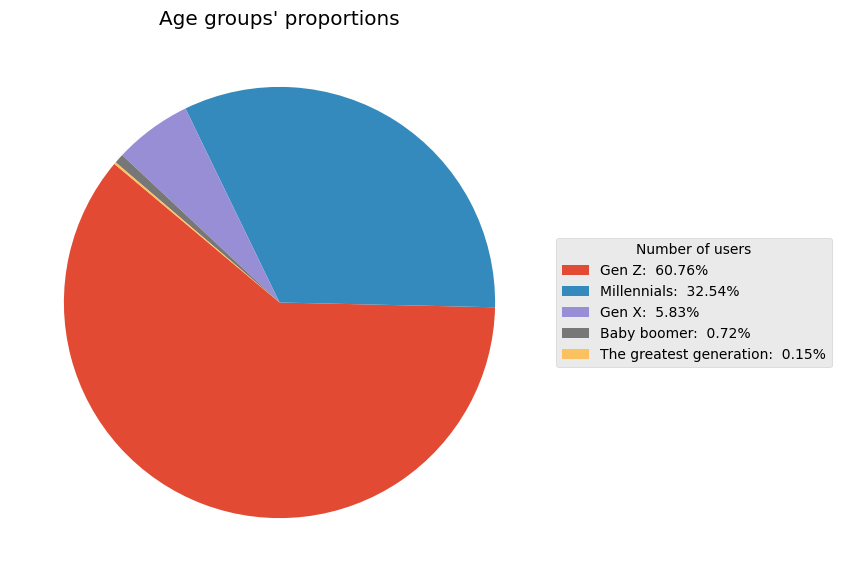

In [ ]:
# Count the occurrences of each age category
age_category_counts = members_df['age_category'].dropna().value_counts()

plt.figure(figsize=(10, 7))
patches, texts = plt.pie(age_category_counts, startangle=140)

plt.title("Age groups' proportions")
plt.legend(patches, labels=[f'{label}: {count*100/age_category_counts.sum(): .2f}%' for label, count in zip(age_category_counts.index, age_category_counts)], title="Number of users", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [ ]:
# Delete unecessary dataframe to free the memory storage
del age_category_counts

We can see that most of the users for this app is gen Z.

#### The relationship between number of plays, chance of repeating and age categories

In [ ]:
train_cleaned["age_category"] = train_cleaned['bd'].apply(categorize_age)

In [ ]:
def count_target_1(x):
    return (x == 1).sum()

In [ ]:
# Group by 'age_category' and calculate mean and count
song_play_by_age = train_cleaned.dropna().groupby("age_category")["target"].agg([count_target_1, 'count'])
song_play_by_age.columns = ["Number of repeat", "Number of play"]
song_play_by_age['Chance of repeating'] = song_play_by_age['Number of repeat']/song_play_by_age['Number of play']

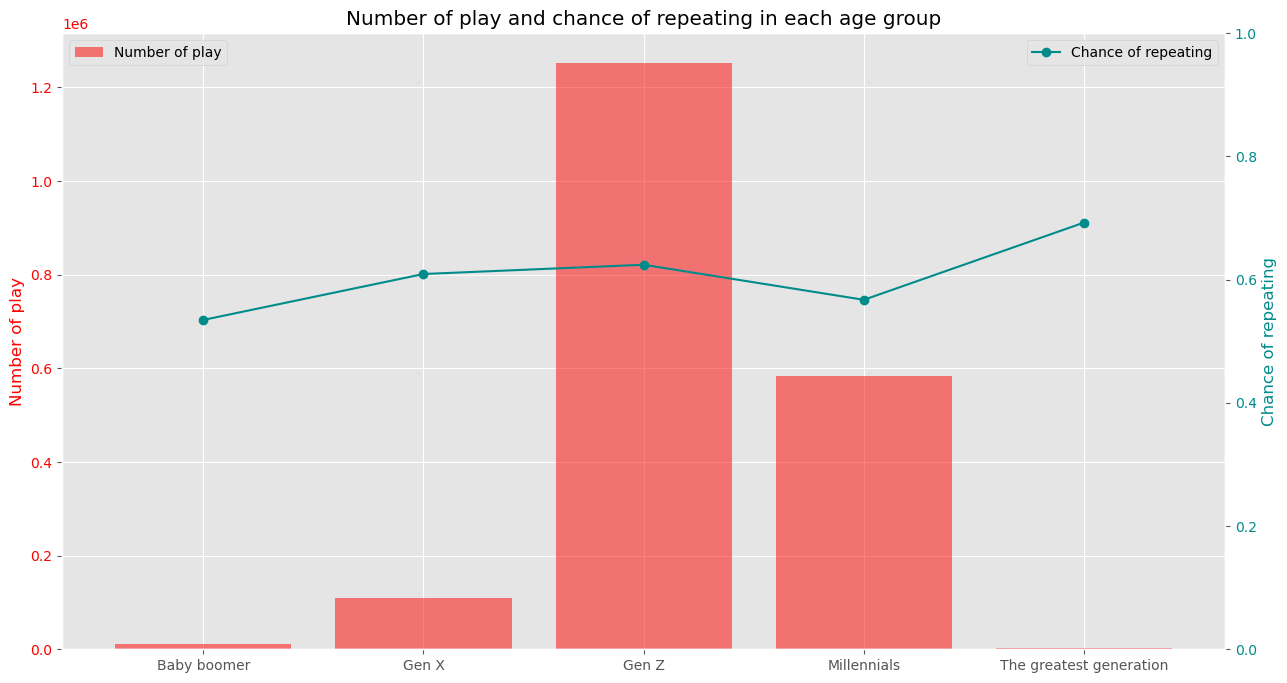

In [ ]:
x = song_play_by_age.index
y1 = song_play_by_age["Number of play"]
y2 = song_play_by_age["Chance of repeating"]

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 8))

# Create first y-axis (left)
ax1.bar(x, y1, color='red', alpha=0.5, label='Number of play')
ax1.set_ylabel('Number of play', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')

# Create second y-axis (right)
ax2 = ax1.twinx()
ax2.plot(x, y2, color='darkcyan', marker='o', label='Chance of repeating')
ax2.set_ylim(0, 1)
ax2.set_ylabel('Chance of repeating', color='darkcyan')
ax2.tick_params(axis='y', labelcolor='darkcyan')
ax2.legend(loc='upper right')

ax2.grid(False)
# Show plot
plt.title('Number of play and chance of repeating in each age group')
plt.show()

Gen Z users exhibit the highest number of plays, with a double margin compared to Millennials. This suggests that Gen Z users are the most active in consuming music on the platform. However, the chances of repeating are not different across age groups.

In [ ]:
# Drop unecessary columns
train_cleaned.drop(columns=['age_category'], inplace = True)
# Delete unecessary dataframe to free the memory storage
del song_play_by_age

#### The relationship between number of plays, chance of repeating and genders

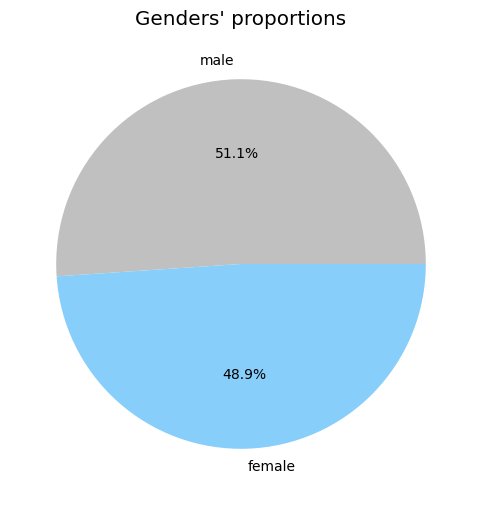

In [ ]:
# Count the occurrences of each gender category
gender_counts = members_df['gender'].value_counts()

# Plot the distribution as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['silver', 'lightskyblue', 'pink'])

# Set plot title
plt.title("Genders' proportions")

# Show plot
plt.show()

In [ ]:
song_play_by_gender = train_cleaned[train_cleaned['gender']!="Unknown"].groupby("gender")["target"].agg([count_target_1, 'count'])
song_play_by_gender.columns = ["Number of repeat", "Number of play"]
song_play_by_gender['Chance of repeating'] = song_play_by_gender["Number of repeat"]/song_play_by_gender["Number of play"]

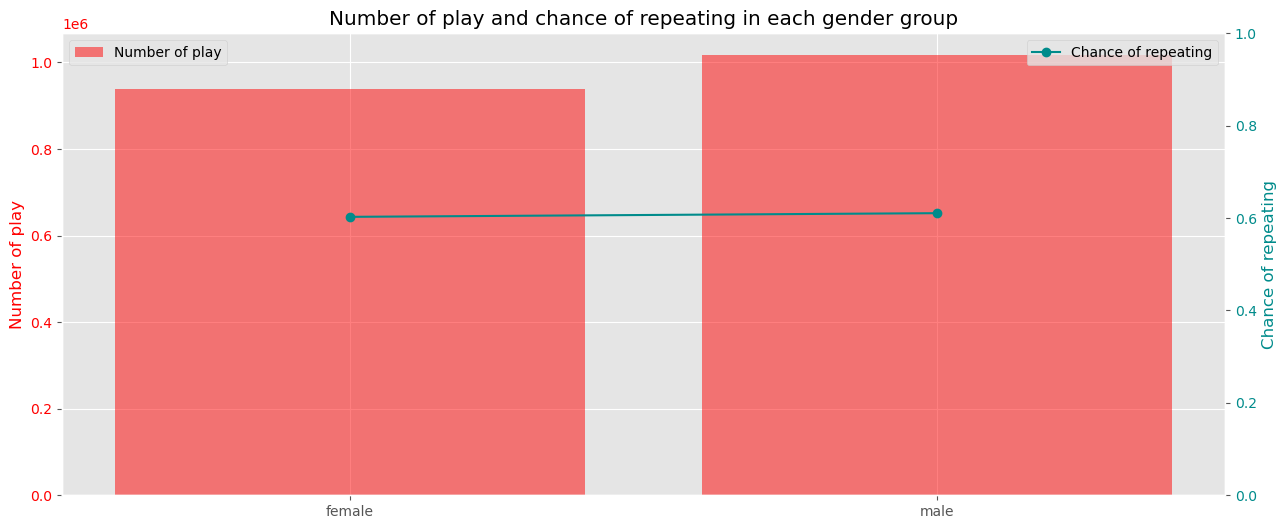

In [ ]:
x = song_play_by_gender.index
y1 = song_play_by_gender["Number of play"]
y2 = song_play_by_gender["Chance of repeating"]

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create first y-axis (left)
ax1.bar(x, y1, color='red', alpha=0.5, label='Number of play')
ax1.set_ylabel('Number of play', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')

# Create second y-axis (right)
ax2 = ax1.twinx()
ax2.plot(x, y2, color='darkcyan', marker='o', label='Chance of repeating')
ax2.set_ylim(0, 1)
ax2.set_ylabel('Chance of repeating', color='darkcyan')
ax2.tick_params(axis='y', labelcolor='darkcyan')
ax2.legend(loc='upper right')

ax2.grid(False)
# Show plot
plt.title('Number of play and chance of repeating in each gender group')
plt.show()

In [ ]:
# Delete unecessary dataframe to free the memory storage
del song_play_by_gender

### Explore the songs

#### Top 5 Countries have most played songs

In [ ]:
def isrc_to_country(isrc):
    if isrc != "Unknown":
        return isrc[:2]
    else:
        return "Unknown"

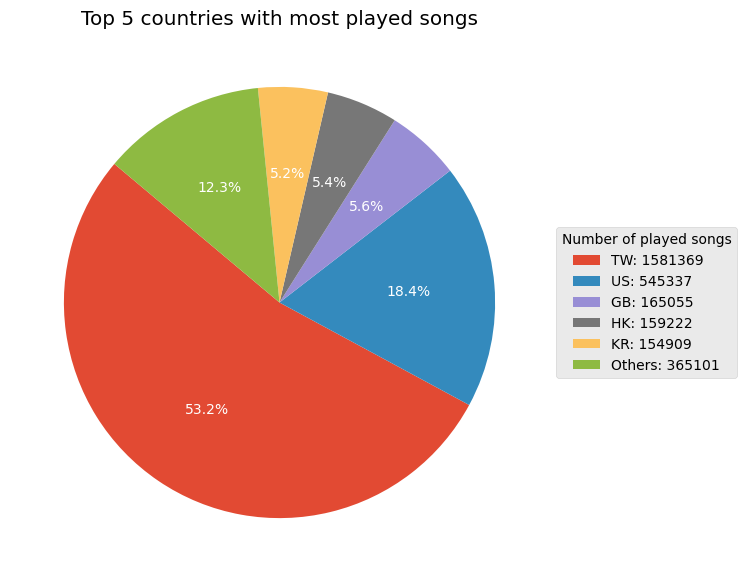

In [ ]:
train_cleaned['country_code'] = train_cleaned['isrc'].apply(isrc_to_country)

country_counts = train_cleaned[train_cleaned['country_code'] != "Unknown"]['country_code'].value_counts()
top_countries = country_counts.head(5)
remain_count = pd.Series(country_counts).sort_values(ascending=False)[5:].sum()

final_counts = top_countries._append(pd.Series(remain_count, index=['Others']))

plt.figure(figsize=(10, 7))
patches, texts, autotexts = plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Top 5 countries with most played songs')
for text in texts + autotexts:
    text.set_color('white')

plt.legend(patches, labels=[f'{label}: {count}' for label, count in zip(final_counts.index, final_counts)], title="Number of played songs", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Taiwan is the home country of KKBOX, where the streaming service originated. As such, it has a significant user base and a deeply entrenched presence in the local market.

Second is The United States with a total number of play times of 545,352, accounting for 18,4%.

Ranked third with the total number of songs played is Great Britain with a total number of play times of 165,055, accounting for 5.6%.

In [ ]:
# Delete unecessary dataframe to free the memory storage
del country_counts, top_countries, remain_count, final_counts

#### Most Popular Artists by Number of Play

(-0.5, 799.5, 399.5, -0.5)

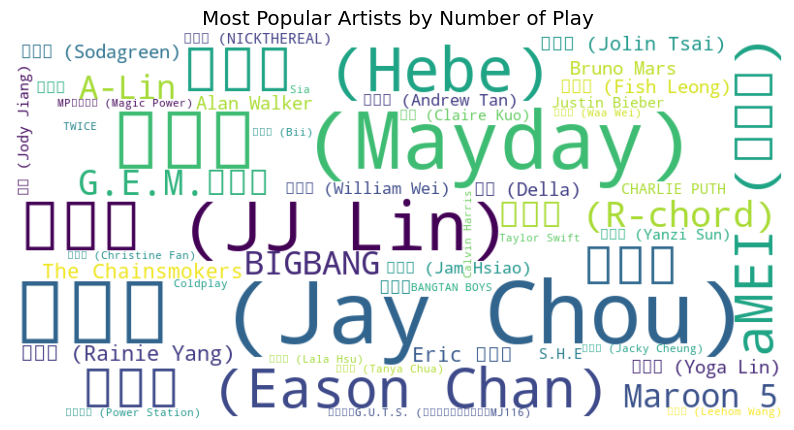

In [ ]:
# Count the occurrences of each artist
artist_counts = train_cleaned[train_cleaned['artist_name'] != 'Various Artists']['artist_name'].value_counts()

# Sort the artists based on their occurrence counts
top_artists = artist_counts.head(50)

artist_counts_dict = top_artists.to_dict()
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(artist_counts_dict)


# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Popular Artists by Number of Play')
plt.axis("Off")

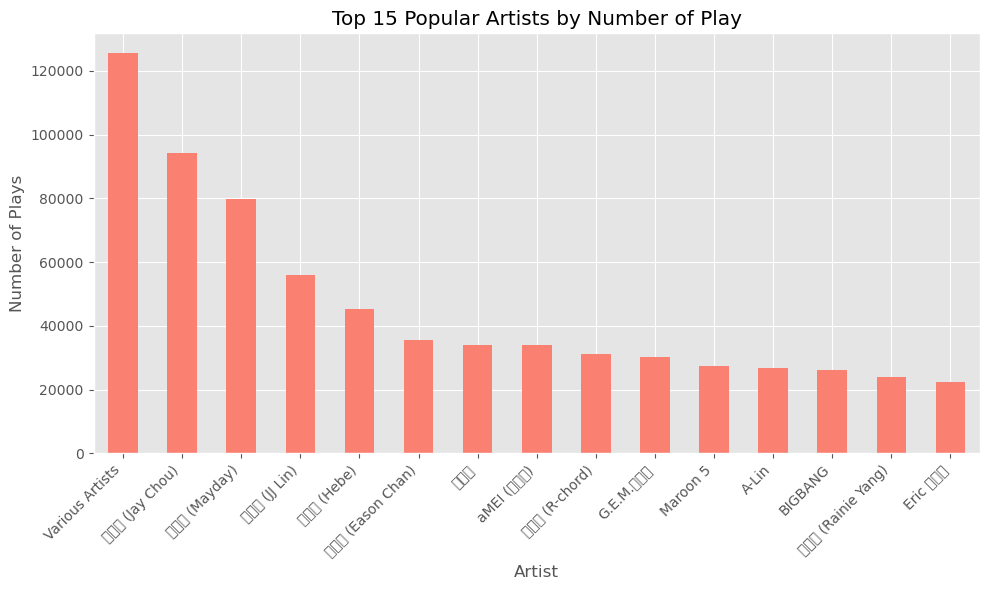

In [ ]:
# Count the occurrences of each artist
artist_counts = train_cleaned['artist_name'].value_counts()

# Sort the artists based on their occurrence counts
top_artists = artist_counts.head(15)
# Plot the top popular artists
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='salmon')
plt.title('Top 15 Popular Artists by Number of Play')
plt.xlabel('Artist')
plt.ylabel('Number of Plays')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Delete unecessary dataframe to free the memory storage
del artist_counts, top_artists

Apart from various artists, Jay Chou and Mayday, two of the most famous artists in Taiwan are listened to the most.

#### Most popular artists to each *gender*

In [ ]:
# Count the occurrences of each artist
artist_counts_female = train_cleaned[train_cleaned['artist_name'] != 'Various Artists'][train_cleaned["gender"] == "female"]['artist_name'].value_counts()
artist_counts_male = train_cleaned[train_cleaned['artist_name'] != 'Various Artists'][train_cleaned["gender"] == "male"]['artist_name'].value_counts()

# Sort the artists based on their occurrence counts
top_artists_female = artist_counts_female.head(15)
top_artists_male = artist_counts_male.head(15)

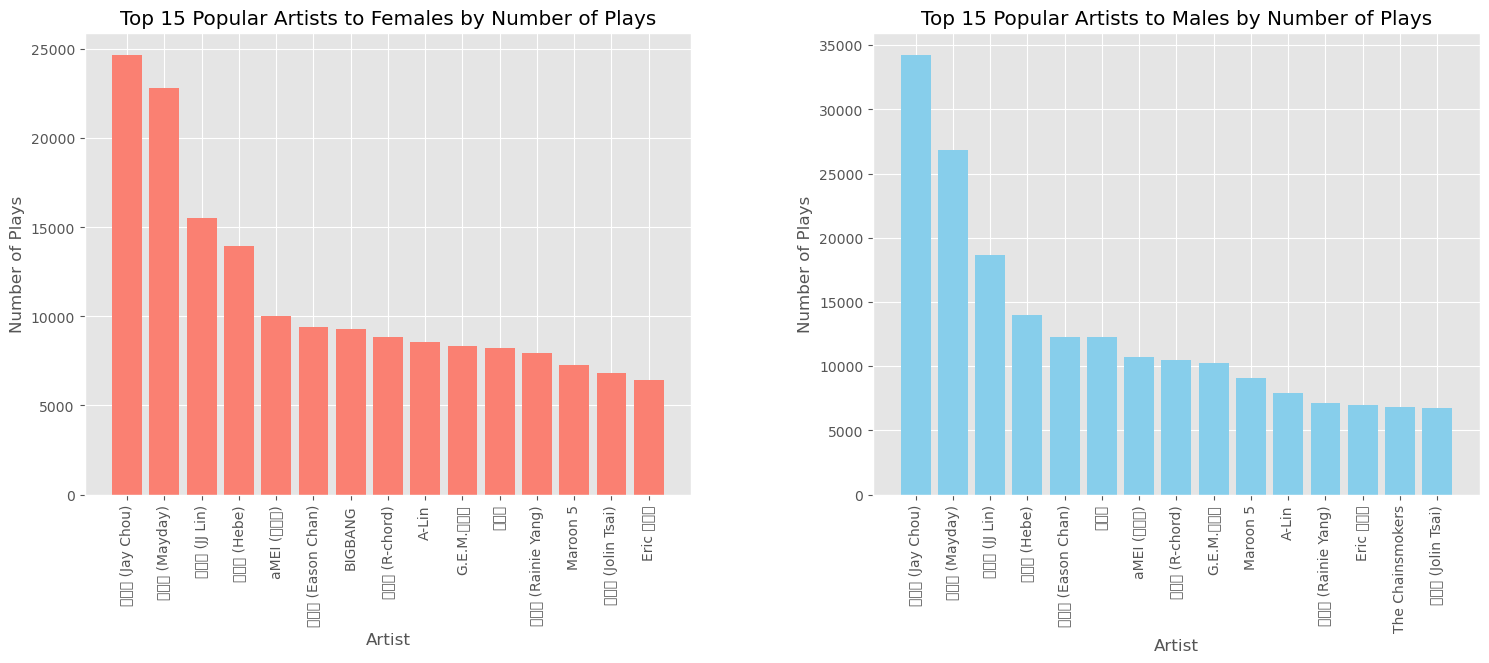

In [ ]:
# Plot the top popular artists
fig, axs = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'wspace': 0.3})

# Plot for female artists
axs[0].bar(top_artists_female.index.str.replace('\$\$','\\$\\$'), top_artists_female, color='salmon')
axs[0].set_title('Top 15 Popular Artists to Females by Number of Plays')
axs[0].set_xlabel('Artist')
axs[0].set_ylabel('Number of Plays')
axs[0].tick_params(axis='x', rotation=90)

# Plot for male artists
axs[1].bar(top_artists_male.index.str.replace('\$\$','\\$\\$'), top_artists_male, color='skyblue')
axs[1].set_title('Top 15 Popular Artists to Males by Number of Plays')
axs[1].set_xlabel('Artist')
axs[1].set_ylabel('Number of Plays')
axs[1].tick_params(axis='x', rotation=90)

plt.show()

It's worth noting that BIGBANG, a famous Korean boy band, is popular among female listeners, and not even in the male's top preference.

In [ ]:
# Delete unecessary dataframe to free the memory storage
del artist_counts_female, artist_counts_male, top_artists_female, top_artists_male

#### Most popular songs to each gender

In [ ]:
# Count the occurrences of each song
song_counts_female = train_cleaned[train_cleaned["gender"] == "female"]['name'].value_counts()
song_counts_male = train_cleaned[train_cleaned["gender"] == "male"]['name'].value_counts()

# Sort the songs based on their occurrence counts
top_song_female = song_counts_female.head(15)
top_song_male = song_counts_male.head(15)

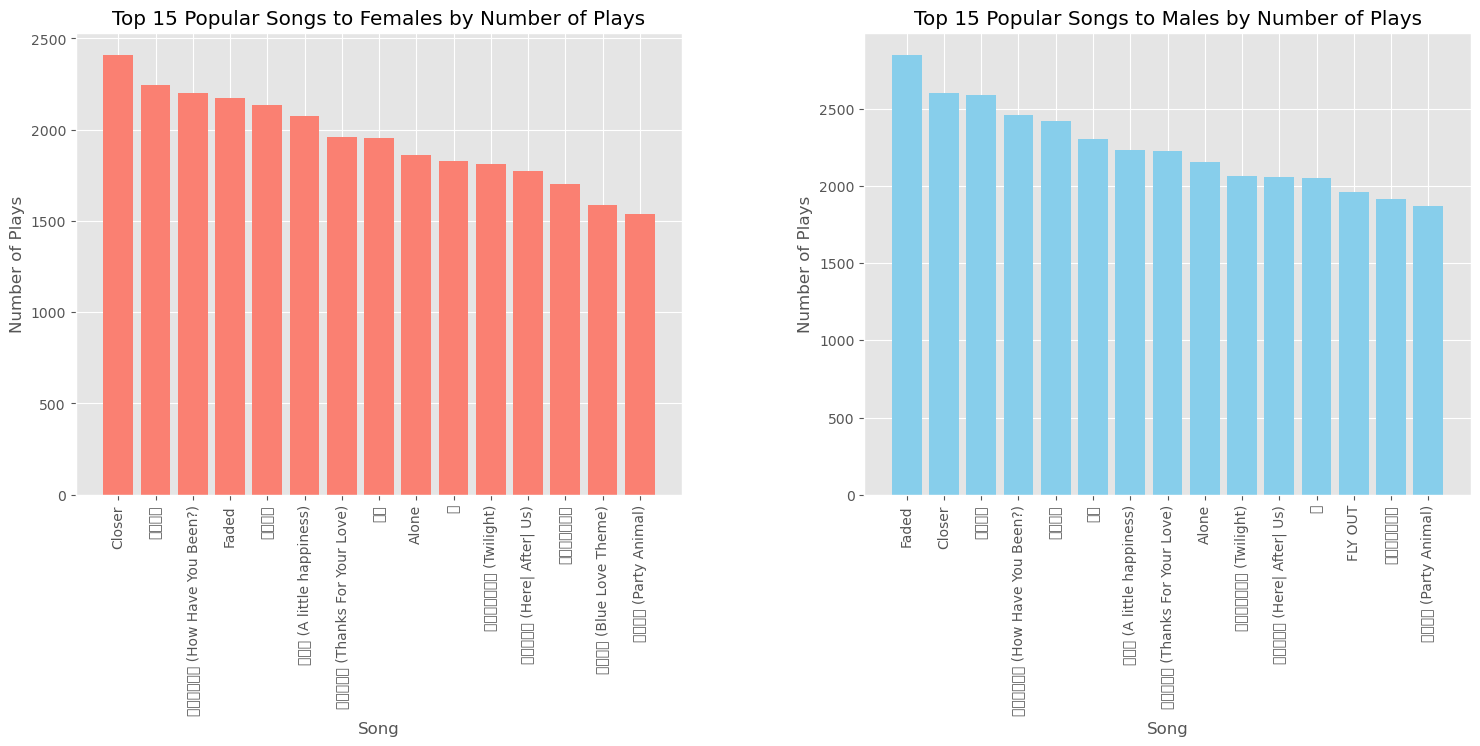

In [ ]:
# Plot the top popular artists
fig, axs = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'wspace': 0.3})

# Plot for female artists
axs[0].bar(top_song_female.index.str.replace('\$\$','\\$\\$'), top_song_female, color='salmon')
axs[0].set_title('Top 15 Popular Songs to Females by Number of Plays')
axs[0].set_xlabel('Song')
axs[0].set_ylabel('Number of Plays')
axs[0].tick_params(axis='x', rotation=90)

# Plot for male artists
axs[1].bar(top_song_male.index.str.replace('\$\$','\\$\\$'), top_song_male, color='skyblue')
axs[1].set_title('Top 15 Popular Songs to Males by Number of Plays')
axs[1].set_xlabel('Song')
axs[1].set_ylabel('Number of Plays')
axs[1].tick_params(axis='x', rotation=90)

plt.show()

In [ ]:
top_song_female = pd.DataFrame(top_song_female).reset_index()
top_song_female.columns = ['Name', 'Count']
print("Top 15 Popular Songs to Female by Number of Plays")
top_song_female

Top 15 Popular Songs to Female by Number of Plays


,Name,Count
0,Closer,2411
1,告白氣球,2245
2,你，好不好？ (How Have You Been?),2200
3,Faded,2172
4,帥到分手,2138
5,小幸運 (A little happiness),2073
6,謝謝妳愛我 (Thanks For Your Love),1960
7,不該,1957
8,Alone,1862
9,默,1828


In [ ]:
top_song_male = pd.DataFrame(top_song_male).reset_index()
top_song_male.columns = ['Name', 'Count']
print("Top 15 Popular Songs to Male by Number of Plays")
top_song_male

Top 15 Popular Songs to Male by Number of Plays


,Name,Count
0,Faded,2849
1,Closer,2603
2,告白氣球,2585
3,你，好不好？ (How Have You Been?),2457
4,帥到分手,2420
5,不該,2303
6,小幸運 (A little happiness),2231
7,謝謝妳愛我 (Thanks For Your Love),2225
8,Alone,2156
9,不為誰而作的歌 (Twilight),2062


In [ ]:
# Delete unecessary dataframe to free the memory storage
del song_counts_female, song_counts_male, top_song_female, top_song_male

#### Number of play versus Chance of repeating

In [ ]:
# Group by 'song_id' and calculate mean and count
song_play = train_cleaned.groupby("song_id")["target"].agg([count_target_1, 'count'])

# Rename the columns
song_play.columns = ["Number of repeat", "Number of play"]

In [ ]:
# Song that has been played the most
song_play["Repeat chance"] = song_play["Number of repeat"]/song_play["Number of play"]

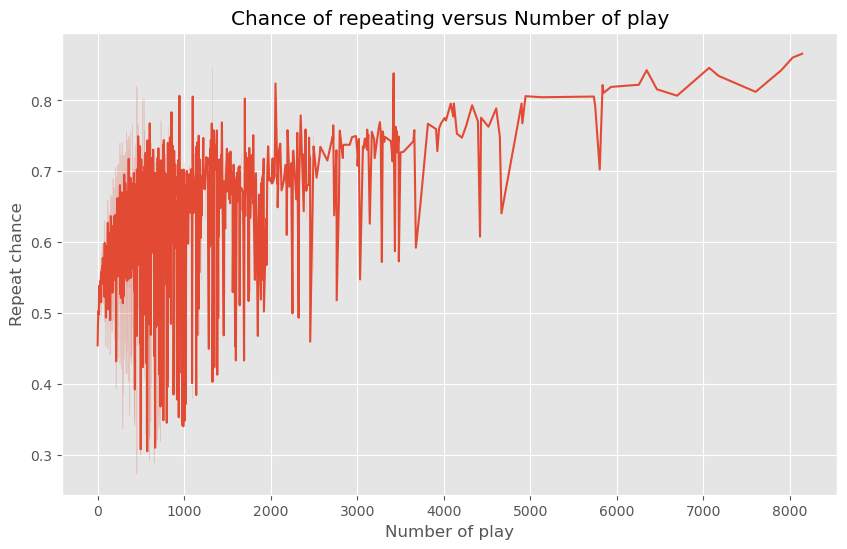

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=song_play["Number of play"], y=song_play["Repeat chance"])
plt.xlabel("Number of play")
plt.ylabel("Repeat chance")
plt.title("Chance of repeating versus Number of play")
plt.show()

It appears that songs played more frequently also tend to have higher chances of being replayed.

In [ ]:
# Delete unecessary dataframe to free the memory storage
del song_play

#### Song length distribution

In [ ]:
song_length = train_cleaned.groupby("song_id").agg({
    "song_length": "mean",
    "target": lambda x: (x == 1).sum(),  # Count the number of times target = 1
    "song_id": "count"  # Count the number of plays for each song_id
})
song_length.columns = ['Song length', 'Number of repeat', 'Number of play']

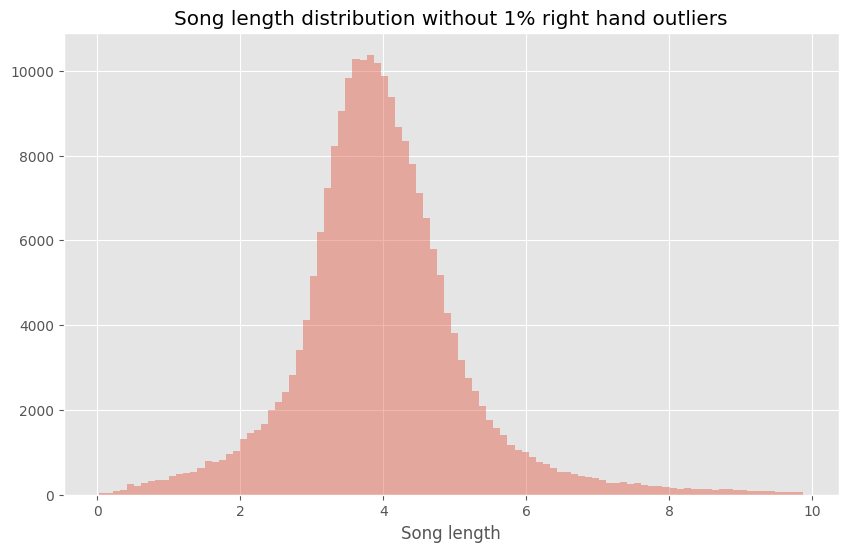

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(song_length[song_length['Song length']<np.quantile(song_length['Song length'],.99)]['Song length']/60000, bins=100, kde=False) # Trim out outliers and convert ms to minutes
plt.title("Song length distribution without 1% right hand outliers")
plt.show()

Songs ranging from 3 minutes 30 seconds to nearly 6 minutes constitute the largest proportion, and songs under 3 minutes 30 seconds and over 6 minutes make up a very small percentage.

### Explore the app

#### Registration pattern

In [ ]:
members_df['registration_init_time'] = pd.to_datetime(members_df['registration_init_time'], format='%Y%m%d')

members_df['registration_year'] = members_df['registration_init_time'].dt.year

members_df = members_df[pd.to_numeric(members_df['registered_via'], errors='coerce').notnull()]

registration_counts = members_df.groupby('registration_year').size()

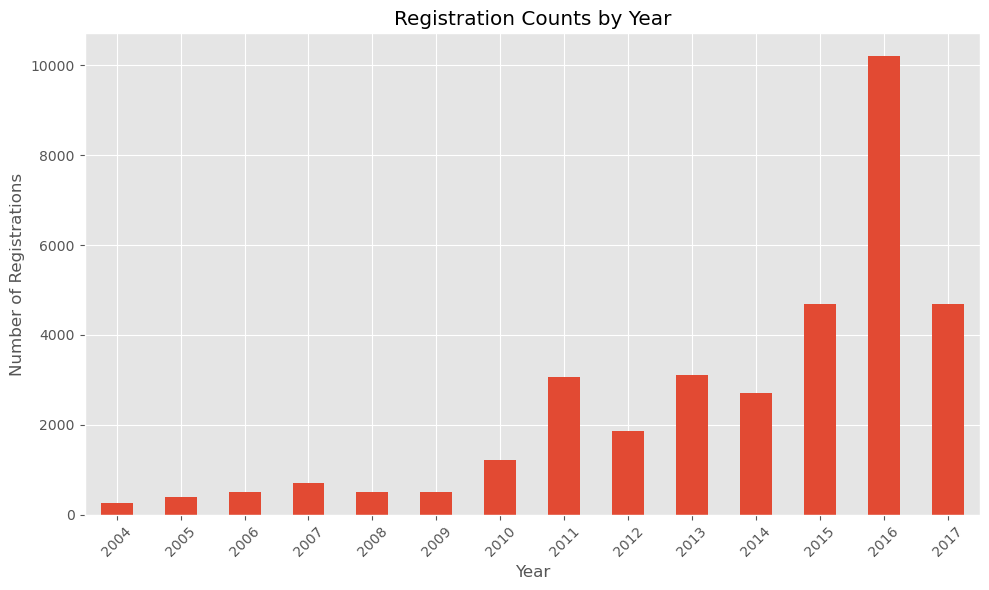

In [ ]:
registration_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Registration Counts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

It appears that KKBox growed significantly after 2011.

#### Number of play and chance of repeating in each source system tab

In [ ]:
system_repeat_chance = train_cleaned.groupby('source_system_tab')["target"].agg([count_target_1, 'count']).reset_index()
system_repeat_chance.columns = ['source_system_tab', 'number_of_repeat', 'number_of_play']
system_repeat_chance['chance_of_repeating'] = system_repeat_chance['number_of_repeat']/system_repeat_chance['number_of_play']

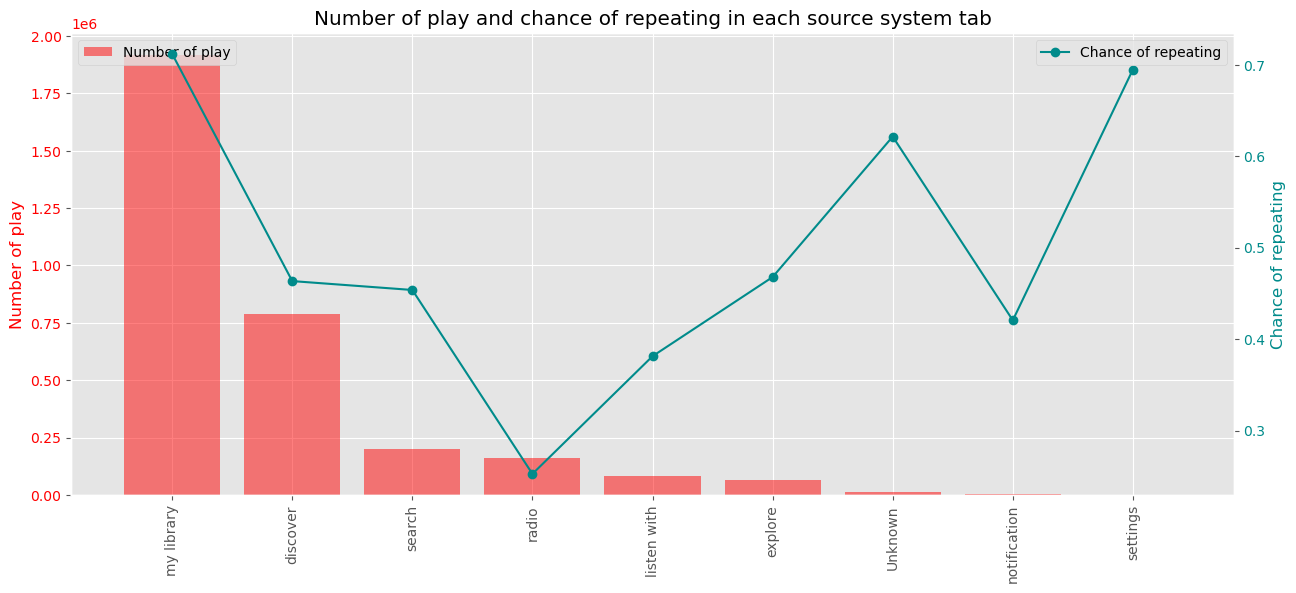

In [ ]:
system_repeat_chance = system_repeat_chance.sort_values(by = 'number_of_play', ascending = False)
x = system_repeat_chance['source_system_tab']
y1 = system_repeat_chance['number_of_play']
y2 = system_repeat_chance['chance_of_repeating']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create first y-axis (left)
ax1.bar(x, y1, color='red', alpha=0.5, label='Number of play')
plt.xticks(rotation=90)
ax1.set_ylabel('Number of play', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')

# Create second y-axis (right)
ax2 = ax1.twinx()
ax2.plot(x, y2, color='darkcyan', marker='o', label='Chance of repeating')
plt.xticks(rotation=90)
ax2.set_ylabel('Chance of repeating', color='darkcyan')
ax2.tick_params(axis='y', labelcolor='darkcyan')
ax2.legend(loc='upper right')

ax2.grid(False)
# Show plot
plt.title('Number of play and chance of repeating in each source system tab')
plt.show()

<div style="text-align:justify">
Among source system tabs, my library tab has the highest number of play and also the highest chance of repeating of more than 0.7. This shows that users of KKBox music trust in their preference and usually replay their favorite songs that were saved in My Library tab.
<br>
<br>
Furthermore, the "Discovery" tab, despite experiencing the second-highest number of plays, has a chance of repeat lower than 0.5. This suggests that users are open to discovering new songs, but sometimes these songs may not align with their preferences, leading to a lower likelihood of recurrence in the future.
</div>

#### Number of play and chance of repeating in each screen layout

In [ ]:
screen_repeat_chance = train_cleaned.groupby('source_screen_name')["target"].agg([count_target_1, 'count']).reset_index()
screen_repeat_chance.columns = ['source_screen_name', 'number_of_repeat', 'number_of_play']
screen_repeat_chance['chance_of_repeating'] = screen_repeat_chance['number_of_repeat']/screen_repeat_chance['number_of_play']

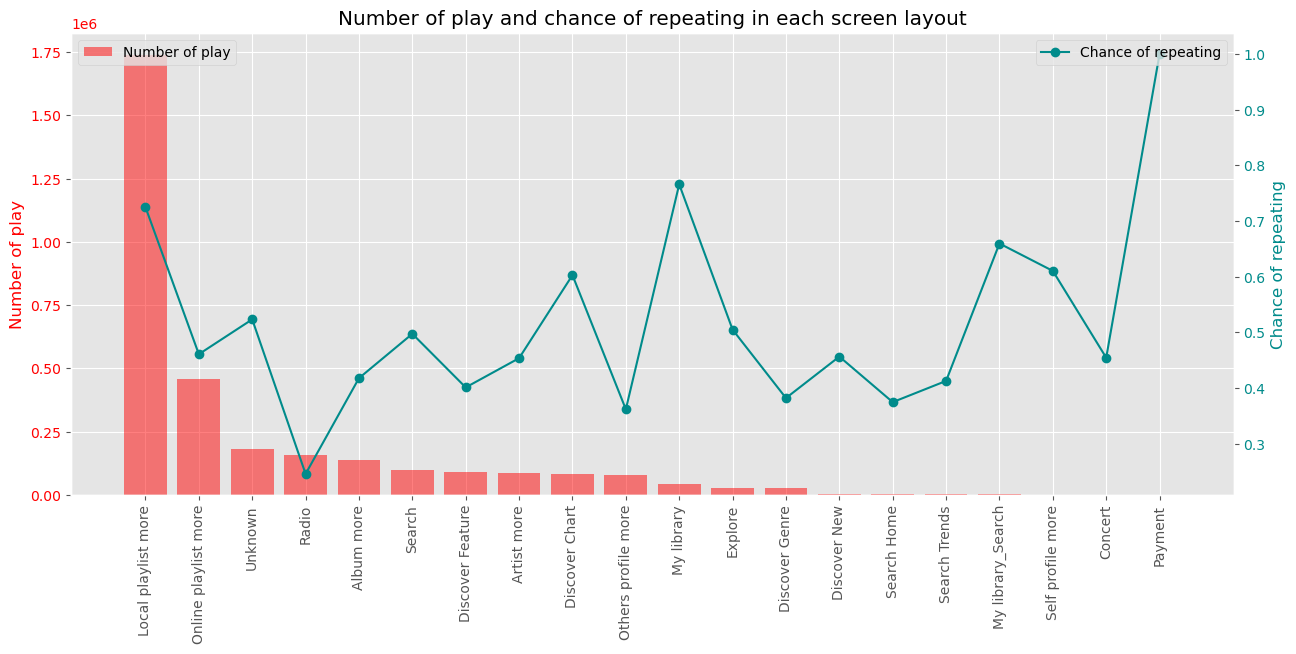

In [ ]:
screen_repeat_chance = screen_repeat_chance.sort_values(by = 'number_of_play', ascending = False)
x = screen_repeat_chance['source_screen_name']
y1 = screen_repeat_chance['number_of_play']
y2 = screen_repeat_chance['chance_of_repeating']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create first y-axis (left)
ax1.bar(x, y1, color='red', alpha=0.5, label='Number of play')
plt.xticks(rotation=90)
ax1.set_ylabel('Number of play', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')

# Create second y-axis (right)
ax2 = ax1.twinx()

ax2.plot(x, y2, color='darkcyan', marker='o', label='Chance of repeating')
plt.xticks(rotation=90)
ax2.set_ylabel('Chance of repeating', color='darkcyan')
ax2.tick_params(axis='y', labelcolor='darkcyan')
ax2.legend(loc='upper right')

ax2.grid(False)
# Show plot
plt.title('Number of play and chance of repeating in each screen layout')
plt.show()

<div style="text-align:justify">
The observation suggests a correlation between certain screen names or features and the source system tab. Specifically, the 'local playlist more' screen or feature appears to be closely associated with the 'My library' source system tab. This association is indicated by the high number of plays observed for local playlists, which are typically stored or accessed within a user's personal library.
<br>
<br>
On the other hand, the 'online playlist more' screen or feature appears to be linked with the 'Discovery' tab of the source system. Despite experiencing a high number of plays, online playlists exhibit a lower chance of repeating compared to local playlists. This might implies that users are more likely to explore and listen to new songs through online playlists, as they are dynamically curated and may introduce users to a wider variety of music. However, the lower chance of repeating suggests that users may not find as many songs in online playlists that align closely with their preferences, leading to fewer repeated listens compared to songs saved in their personal libraries.
</div>

#### Number of play and chance of repeating in each source type

In [ ]:
type_repeat_chance = train_cleaned.groupby('source_type')["target"].agg([count_target_1, 'count']).reset_index()
type_repeat_chance.columns = ['source_type', 'number_of_repeat', 'number_of_play']
type_repeat_chance['chance_of_repeating'] = type_repeat_chance['number_of_repeat']/type_repeat_chance['number_of_play']

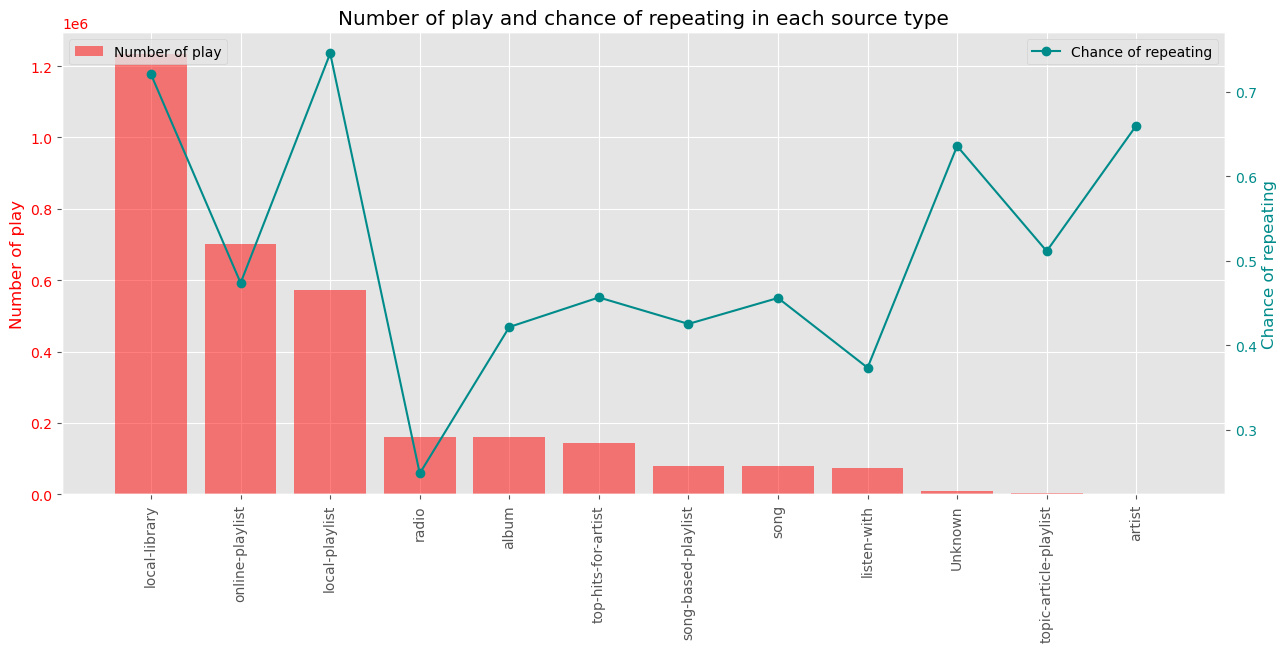

In [ ]:
type_repeat_chance = type_repeat_chance.sort_values(by = 'number_of_play', ascending = False)
x = type_repeat_chance['source_type']
y1 = type_repeat_chance['number_of_play']
y2 = type_repeat_chance['chance_of_repeating']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create first y-axis (left)
ax1.bar(x, y1, color='red', alpha=0.5, label='Number of play')
plt.xticks(rotation=90)

ax1.set_ylabel('Number of play', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')

# Create second y-axis (right)
ax2 = ax1.twinx()

ax2.plot(x, y2, color='darkcyan', marker='o', label='Chance of repeating')
plt.xticks(rotation=90)
ax2.set_ylabel('Chance of repeating', color='darkcyan')
ax2.tick_params(axis='y', labelcolor='darkcyan')
ax2.legend(loc='upper right')

ax2.grid(False)
# Show plot
plt.title('Number of play and chance of repeating in each source type')
plt.show()

<div style="text-align:justify">
Source type is the entry point a user first plays music on mobile apps. Different source types often indicate distinct user behaviors and intentions. For example, a user who starts playing a song from an "Online playlist" may be in a discovery mode, exploring new music, while someone who plays a song from "My library" might be revisiting their favorite tracks.
<br>
<br>
 When analyzing the source types for predicting song recurrence, it's evident that certain source types exhibit distinct characteristics. Interestingly, the "Local playlist" and "My library" source types stand out as having the highest chance of repeating songs, indicating a strong sense of <b>user loyalty and preference for saved or locally stored content</b>. Additionally, it's noteworthy that the "Local playlist" source type also records the highest number of plays, suggesting a significant level of user engagement with this feature. This dual observation highlights the importance of personalized and locally curated content to users, as well as the propensity for repeated enjoyment of songs within these playlists and libraries.

In [ ]:
# Delete unecessary dataframe to free the memory storage
del system_repeat_chance, screen_repeat_chance, type_repeat_chance, x, y1, y2

## **IV. Music Recommendations System**

In [ ]:
# Delete unecessary dataframe to free the memory storage
del train_df, test_df, songs_df, song_extra_df, members_df

### **4.1. Features engineering**

<div style="text-align:justify">
The table below summarizes the additional features that have been extracted from the original columns.
</div>

Attributes | Data Type<br>(original) | Reasons to extract | Features extracted
-----------|-----------|------------------|----------------
lyricist | object | Some values are combined by many other unique values with a "\|", sometimes with "/" or even "\\\\" | Split to 4 columns: 3 first lyricist and number of lyricists
composer | object | Some values are combined by many other unique values with a "\|", sometimes with "/" or even "\\\\"  | Split to 4 columns: 3 first composers and number of composers
genre_ids | object | Some values are combined by many other unique values with a "\|", sometimes with "/" or even "\\\\"  | Split to 4 columns: 3 first genres and number of genres
artist_name | object | Some values are combined by many other unique values with "\|", "&", "feat." "+", "featuring", "and", "with" and "vs"  | Split to 4 columns: 3 first artist names and number of artist names
isrc | object | The codes itself offer no valuable information | Extract releasing year & country code
registration_init_time | int64 | Each member has their unique registration date so there is no pattern captured | Extract to membership days
expiration_date	 | int64 | Each member has their unique expiration date so there is no pattern captured| Extract to membership days

#### Lyricist, composer, genre_ids and artist_name

In [ ]:
list(train_cleaned["lyricist"].unique())[-10:]

['Albert Hammond| Michael Hazelwood',
 'Joseph Langridge-Brown|Julian Emery|Dominic Craik|Conor Mason|Jim Irvin',
 'Kalimba Marichal',
 'Nik Karpen; Andrew Schubert; Chris Lord-Alge; Rob Cavallo; Keith Armstrong; Aaron Walk; Steve Rea; Russ Waugh; Doug McKean; Brad Townsend; Lars Fox; Dan Chase',
 'Runjie Liu',
 'Julian Casablancas',
 'Louis Lo',
 'Tyshan Knight',
 'Hyo-Je Kim',
 'Miryam Latrece']

<div style="text-align:justify">
Since each combinations will be treated differently in the model even when they have some components in common, this column will be split into four columns with the aim to capture as much information as possible. The first three added columns will contains the first three gernes/composers/lyricists/artist names, and the fourth added column will be the number of gernes/composers/lyricists/artist names.
</div>

In [ ]:
def split_component(df, column_name):
  df[f"Num_of_{column_name}"] = np.nan
  df[f"First_{column_name}"] = np.nan
  df[f"Second_{column_name}"] = np.nan
  df[f"Third_{column_name}"] = np.nan
  for index, row in df.iterrows():
      if row[column_name] == "Unknown":
        df.at[index, f"Num_of_{column_name}"] = 0
        df.at[index, f"First_{column_name}"] = "None"
        df.at[index, f"Second_{column_name}"] = "None"
        df.at[index, f"Third_{column_name}"] = "None"
        continue
      list_comp = row[column_name].replace(';', "|").replace("/", "|").replace("\\", "|").split("|")
      df.at[index, f"Num_of_{column_name}"] = len(list_comp)
      df.at[index, f"First_{column_name}"] = list_comp[0].strip()
      try:
        df.at[index, f"Second_{column_name}"] = list_comp[1].strip()
      except IndexError:
        df.at[index, f"Second_{column_name}"] = "None"
      try:
        df.at[index, f"Third_{column_name}"] = list_comp[2].strip()
      except IndexError:
        df.at[index, f"Third_{column_name}"] = "None"
  print(f"Done {column_name}")

def split_artist_name(df, column_name):
  df[f"Num_of_{column_name}"] = np.nan
  df[f"First_{column_name}"] = np.nan
  df[f"Second_{column_name}"] = np.nan
  df[f"Third_{column_name}"] = np.nan
  for index, row in df.iterrows():
      if row[column_name] == "Unknown":
        df.at[index, f"Num_of_{column_name}"] = 0
        df.at[index, f"First_{column_name}"] = "None"
        df.at[index, f"Second_{column_name}"] = "None"
        df.at[index, f"Third_{column_name}"] = "None"
        continue
      if row[column_name] == "Various Artists":
        df.at[index, f"Num_of_{column_name}"] = -1
        df.at[index, f"First_{column_name}"] = "Various Artists"
        df.at[index, f"Second_{column_name}"] = "Various Artists"
        df.at[index, f"Third_{column_name}"] = "Various Artists"
        continue
      list_comp = row[column_name].replace('&', "|").replace("feat.", "|").replace("+", "|").replace("featuring", "|").replace("and", "|").replace("with", "|").replace("vs", "|").split("|")
      df.at[index, f"Num_of_{column_name}"] = len(list_comp)
      df.at[index, f"First_{column_name}"] = list_comp[0].strip()
      try:
        df.at[index, f"Second_{column_name}"] = list_comp[1].strip()
      except IndexError:
        df.at[index, f"Second_{column_name}"] = "None"
      try:
        df.at[index, f"Third_{column_name}"] = list_comp[2].strip()
      except IndexError:
        df.at[index, f"Third_{column_name}"] = "None"
  print(f"Done {column_name}")

In [ ]:
split_component(train_cleaned, "genre_ids")
split_component(train_cleaned, "composer")
split_component(train_cleaned, "lyricist")
split_artist_name(train_cleaned, "artist_name")

Done genre_ids
Done composer
Done lyricist
Done artist_name


In [ ]:
split_component(test_cleaned, "genre_ids")
split_component(test_cleaned, "composer")
split_component(test_cleaned, "lyricist")
split_artist_name(test_cleaned, "artist_name")

Done genre_ids
Done composer
Done lyricist
Done artist_name


In [ ]:
train_cleaned.drop(columns = ["genre_ids", "composer", "lyricist", "artist_name"], inplace = True)
test_cleaned.drop(columns = ["genre_ids", "composer", "lyricist", "artist_name"], inplace = True)

#### isrc

In [ ]:
def isrc_to_year(isrc):
    if isrc != "Unknown":
        if int(isrc[5:7]) > 17:
            return 1900 + int(isrc[5:7])
        else:
            return 2000 + int(isrc[5:7])
    else:
        return -1

In [ ]:
train_cleaned['release_year'] = train_cleaned['isrc'].apply(isrc_to_year)
test_cleaned['release_year'] = test_cleaned['isrc'].apply(isrc_to_year)
test_cleaned['country_code'] = test_cleaned['isrc'].apply(isrc_to_country)

In [ ]:
train_cleaned.drop(columns="isrc", inplace = True)
test_cleaned.drop(columns="isrc", inplace = True)

#### registration_init_time and expiration_date

In [ ]:
train_cleaned['membership_days'] = (train_cleaned['expiration_date'] - train_cleaned['registration_init_time']).dt.days
test_cleaned['membership_days'] = (test_cleaned['expiration_date'] - test_cleaned['registration_init_time']).dt.days

In [ ]:
train_cleaned.drop(columns = ["registration_init_time", "expiration_date"], inplace = True)
test_cleaned.drop(columns = ["registration_init_time", "expiration_date"], inplace = True)

### **4.2. Data preprocessing**

In [ ]:
# Convert to categorical type
for col in train_cleaned.select_dtypes(include="O").columns:
    train_cleaned[col] = train_cleaned[col].astype('category')
    test_cleaned[col] = test_cleaned[col].astype('category')

In [ ]:
# Encoding categorical features
encoder = LabelEncoder()
for col in train_cleaned.select_dtypes(include=['category']).columns:
    train_cleaned[col] = encoder.fit_transform(train_cleaned[col])
    test_cleaned[col] = encoder.fit_transform(test_cleaned[col])

In [ ]:
# Convert language, releasing year and target to int type
train_cleaned["language"] = train_cleaned["language"].astype(int)
train_cleaned["release_year"] = train_cleaned["release_year"].astype(int)
train_cleaned["target"] = train_cleaned["target"].astype(int)
test_cleaned["language"] = test_cleaned["language"].astype(int)
test_cleaned["release_year"] = test_cleaned["release_year"].astype(int)

In [ ]:
X = train_cleaned.drop(columns = ["song_id", "target", "msno"])
y = train_cleaned["target"]

In [ ]:
# Check X and y shape
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (3221240, 29)
y shape: (3221240,)


In [ ]:
# Split 70% data for training set, 30% data for testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1502)

In [ ]:
del train_cleaned

### **4.3. Recommendation Models**

#### 4.3.1. Logistic Regression

In [ ]:
# Define Logistic Regression model
logModel = LogisticRegression()

# Define search space
space = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [100, 10, 1.0, 0.1, 0.01]
}

# Define RandomizedSearchCV
search = RandomizedSearchCV(logModel, space,  n_iter=20, cv=3, n_jobs=-1)

# Execute search
result = search.fit(X_train, y_train)

# Summarize result
print('Best Score:', result.best_score_)
print('Best Hyperparameters:', result.best_params_)

Best Score: 0.6214142025975904
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}


In [ ]:
# Use the best estimator found by randomized search for prediction
best_logreg = search.best_estimator_
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", logreg_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6215142822846689
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.17      0.27    387360
           1       0.62      0.92      0.74    579012

    accuracy                           0.62    966372
   macro avg       0.61      0.55      0.51    966372
weighted avg       0.61      0.62      0.55    966372



#### 4.3.2. Decision Trees

In [ ]:
# Define the parameter distribution
param_dist = {
    'max_depth': [None] + list(np.arange(5, 21, 5)),
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameters tuning
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 20}


In [ ]:
# Use the best estimator found by randomized search for prediction
best_decision_tree = random_search.best_estimator_
best_decision_tree.fit(X_train, y_train)
test_prediction = best_decision_tree.predict(X_test)
decisionTree_acc = accuracy_score(y_test, test_prediction)
print("Accuracy:", decisionTree_acc)
print("Classification Report:\n", classification_report(y_test, test_prediction))

Accuracy: 0.6994511430380848
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.52      0.58    387360
           1       0.72      0.82      0.77    579012

    accuracy                           0.70    966372
   macro avg       0.69      0.67      0.67    966372
weighted avg       0.69      0.70      0.69    966372



#### 4.3.3. Naive Bayes

In [ ]:
# Define Gaussian Naive Bayes model
gauNB = GaussianNB()

# Define hyperparameters to tune
param_dist = {
    'var_smoothing': [1e-6, 1e-5, 1e-4]
}

# Hyperparameters tuning with RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gauNB,
    param_distributions=param_dist,
    n_iter=20,  # Adjust the number of iterations as needed
    cv=3, n_jobs=-1       # Adjust the number of folds as needed
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'var_smoothing': 0.0001}
Best score: 0.6008435970984071


In [ ]:
# Use the best estimator found by random search for prediction
best_gauNB = random_search.best_estimator_
test_prediction = best_gauNB.predict(X_test)
gauNB_acc = accuracy_score(y_test, test_prediction)
print("Accuracy:", gauNB_acc)
print("Classification Report:\n", classification_report(y_test, test_prediction))

Accuracy: 0.6013564134722447
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.07      0.12    387360
           1       0.61      0.96      0.74    579012

    accuracy                           0.60    966372
   macro avg       0.56      0.51      0.43    966372
weighted avg       0.57      0.60      0.49    966372



#### 4.3.4. Random Forest

In [ ]:
randomForest = RandomForestClassifier(bootstrap = True,
    max_depth= 15,
    max_features= 3,
    min_samples_leaf= 2,
    min_samples_split= 2,
    n_estimators= 1000)
randomForest.fit(X_train, y_train)
test_prediction = randomForest.predict(X_test)
randomForest_acc = accuracy_score(y_test,test_prediction)
print("Accuracy : ", randomForest_acc)
print("Classification Report:\n",classification_report(y_test, test_prediction))

Accuracy :  0.695602728555877
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.52      0.58    387360
           1       0.72      0.81      0.76    579012

    accuracy                           0.70    966372
   macro avg       0.68      0.67      0.67    966372
weighted avg       0.69      0.70      0.69    966372



### **4.6. Model Comparisons**

In [ ]:
rows = [
    ["Logistic Regression",logreg_acc],
    ["Decision Trees",decisionTree_acc],
    ["RandomForest",randomForest_acc],
    ["Naive Bayes",gauNB_acc]
    ]
results = pd.DataFrame(rows,
                       columns = ["Model","Test Evaluation %"]).sort_values(
                        by="Test Evaluation %",ascending=False)
results.style.background_gradient(cmap='Set3')

,Model,Test Evaluation %
1,Decision Trees,0.699451
2,RandomForest,0.695603
0,Logistic Regression,0.621514
3,Naive Bayes,0.601356


<div style="text-align:justify">
Decision Trees is the top-performing models in this evaluation so it will be chosen.
</div>

### **4.7. Most important features**

In [ ]:
#Feature importances
feature_scores = pd.Series(best_decision_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)

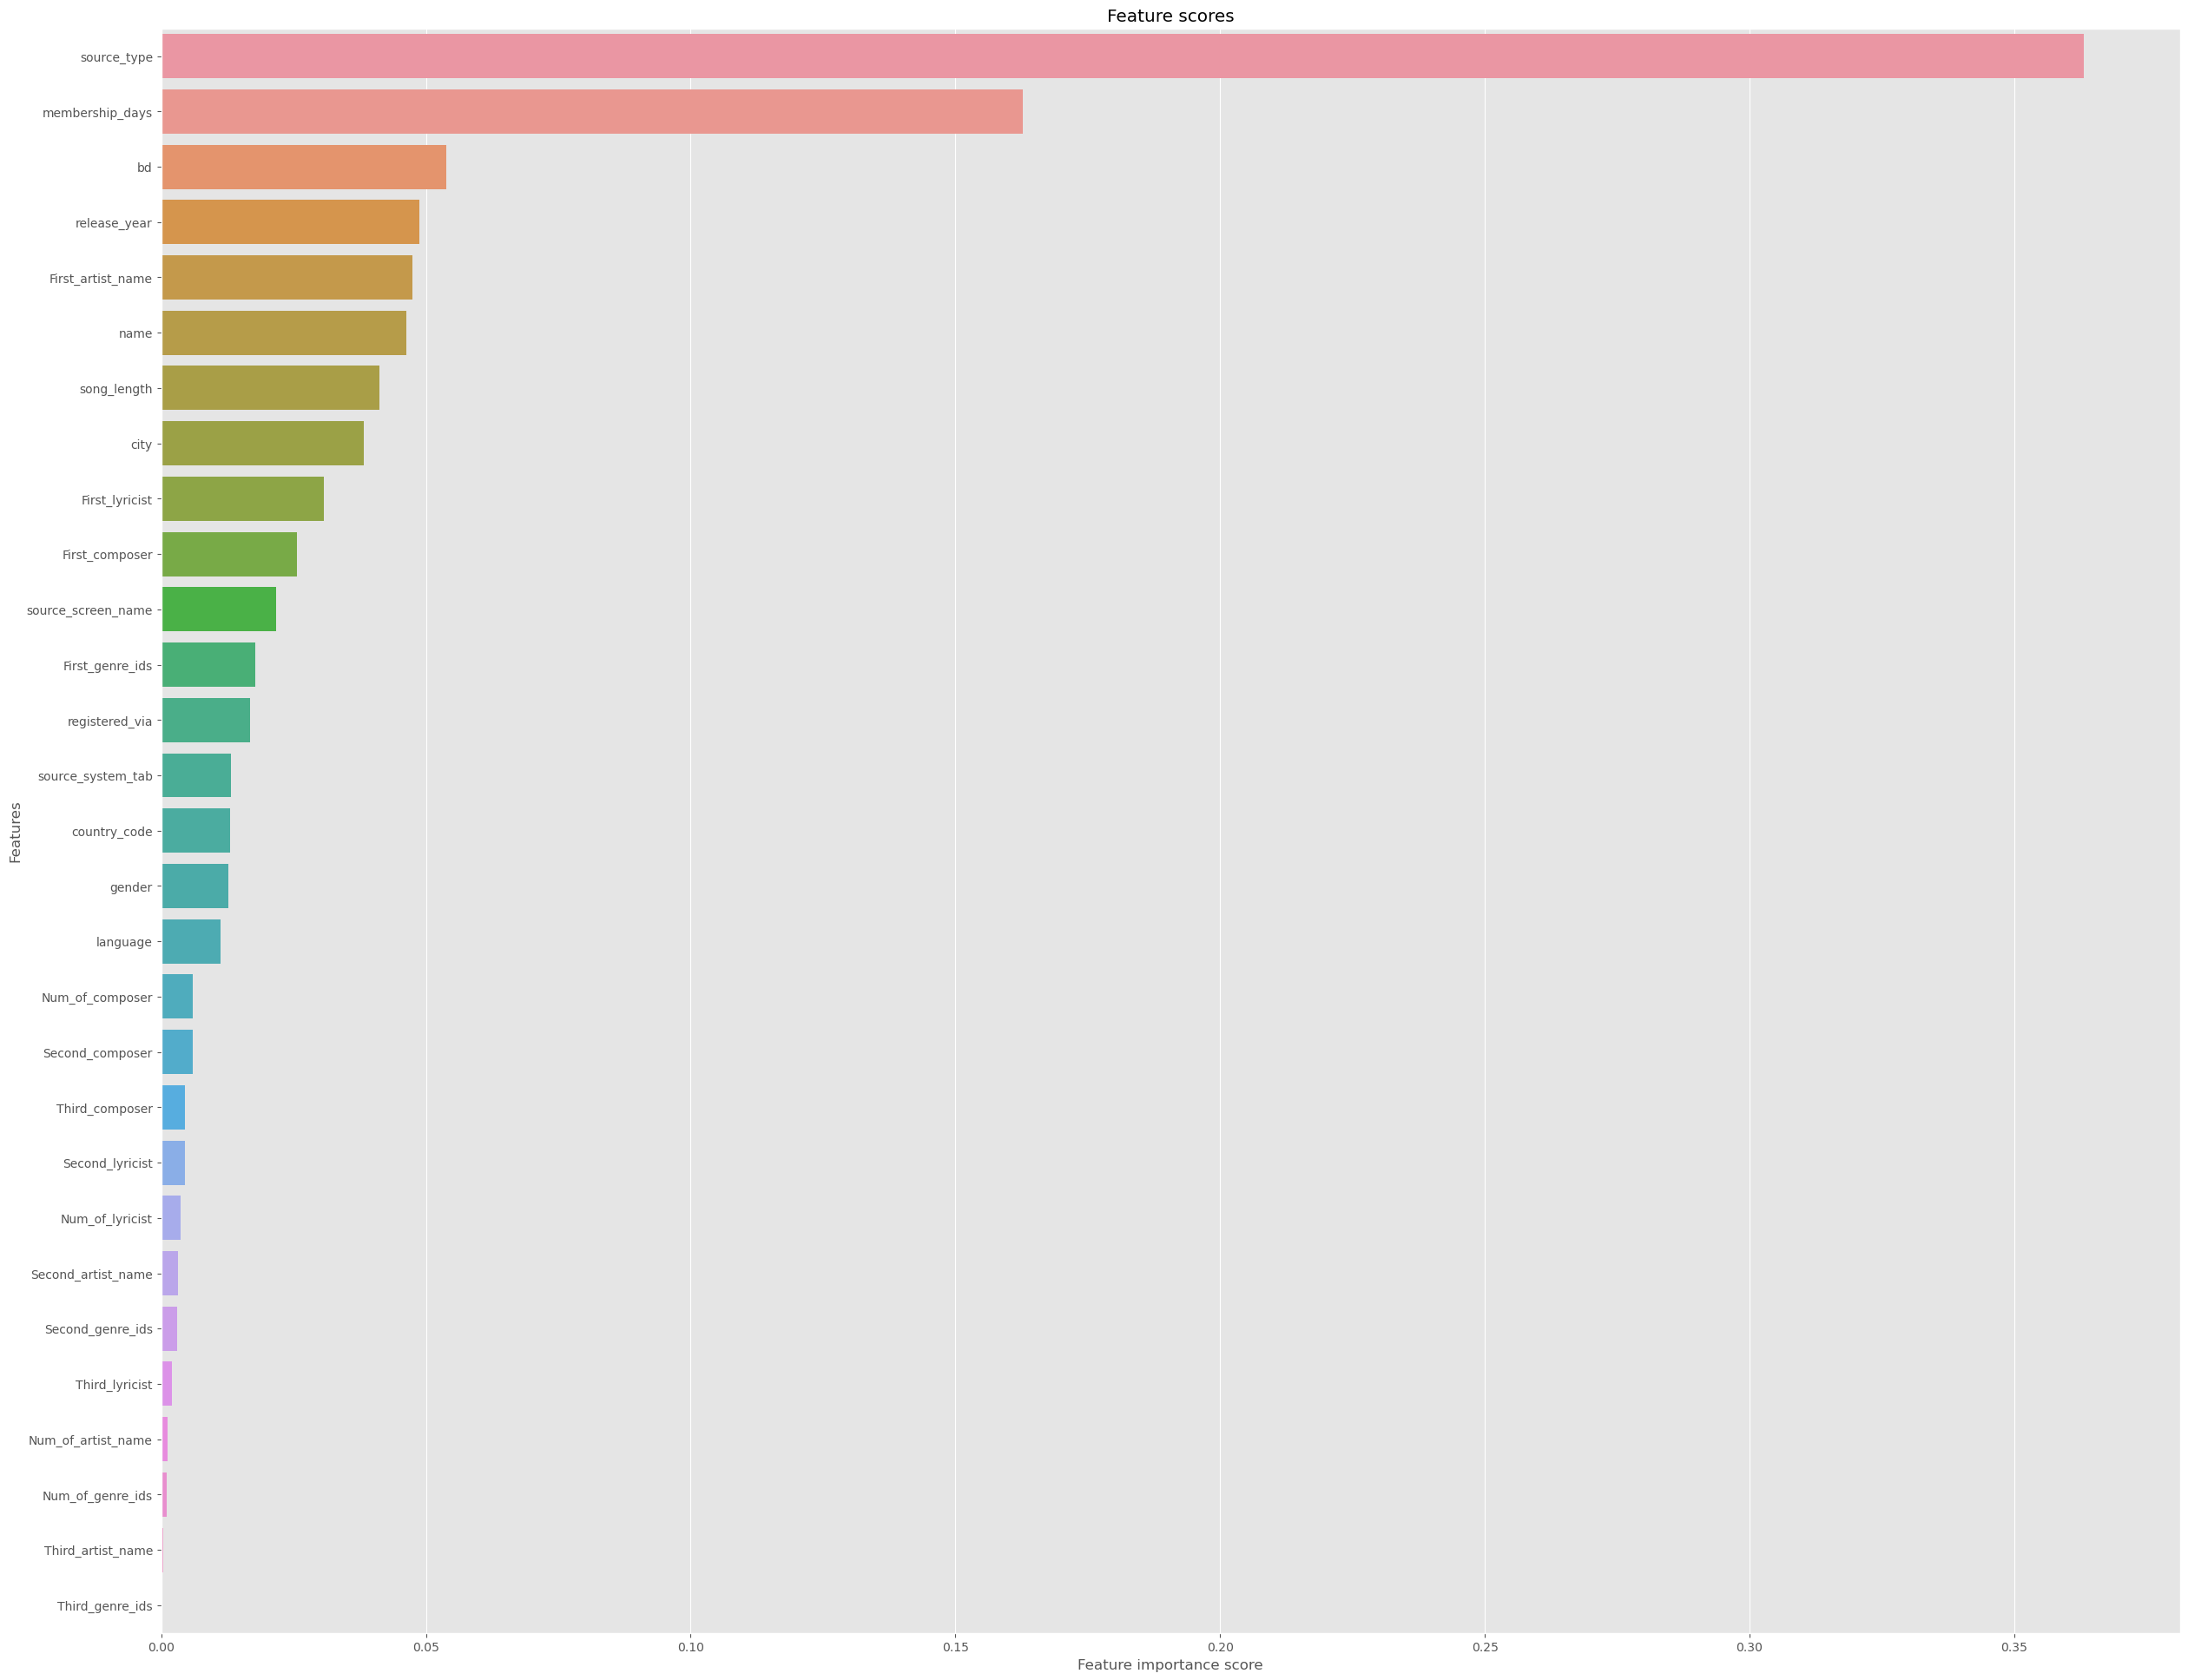

In [ ]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Feature scores")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

<Axes: >

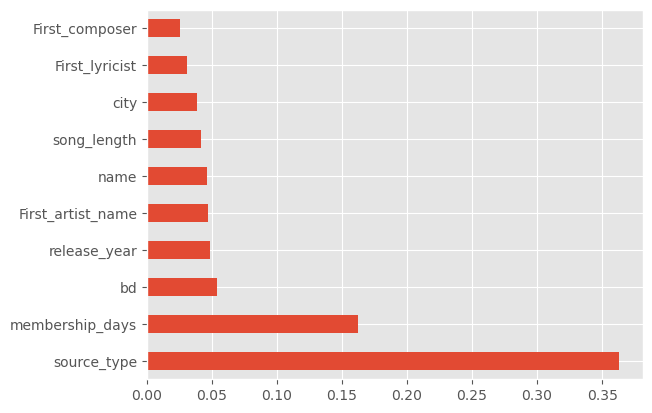

In [ ]:
feature_scores.nlargest(10).plot(kind='barh')

<div style="text-align:justify">
The important features here are source_type, membership_days, and birthday.
<br>
<br>
The results of source_types are consistent with the analysis above as it represents the final step before a music track is replayed. Following this step, the track is played, contributing to the chance of repeating. The source type holds significant importance when predicting the likelihood of song recurrence in the future due to its role as the last interactive point with the user before songs are played. As the entry point for music playback on mobile apps, the source type reflects the user's decision-making process and preferences regarding the selection of songs. Since it represents a collection of songs curated by the platform or chosen by the user, it provides valuable insights into the user's music consumption behavior and interests. By understanding which source types are associated with higher or lower recurrence rates, we can infer the impact of different music discovery methods, such as online playlists, radio, or personalized recommendations, on user engagement and satisfaction.
<br>
<br>
Although "membership_days'' may not initially be considered a significant factor in predicting repeat listening patterns, its placement as the second most important factor suggests its potential. This opens up a new avenue for further research into the role of "membership_days" in the context of annual registration numbers for predicting repeat listening patterns.
<br>
<br>
The "bd" variable, representing age groups, emerges as the third most important factor in predicting the target variable. Age is a significant predictor of repeating behaviors due to its correlation with lifestyle factors, music preferences, and familiarity with technology. Additionally, age reflects life stages and transitions, impacting music consumption habits and engagement with streaming services.
</div>

### **4.8. Predictions for the provided testing set**

In [ ]:
X_test_provided = test_cleaned.drop(columns = ['id', 'msno','song_id'])
new_order = list(X_train.columns)
X_test_provided = X_test_provided[new_order]
submission = pd.DataFrame(test_cleaned['id'])
test_provided_predictions = best_decision_tree.predict(X_test_provided)
submission['target'] = test_provided_predictions
submission.to_csv("submission.csv", index = False)